## Linear Regression

---

## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12

---

In [3]:
#Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#read the csv file into a pandas dataframe
lsd = pd.read_csv('../../dataset/lsd.csv')
lsd.head()

,tc,score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [3]:
#Assign the data to X and y
#Note: Sklearn requires a 7 x1 array of values, so we reshape to create this

X = lsd.tc.values.reshape(-1,1)
y = lsd.score.values.reshape(-1,1)

print('Shape: ', X.shape, y.shape)
X

Shape:  (7, 1) (7, 1)


array([[1.17],
       [2.97],
       [3.26],
       [4.69],
       [5.83],
       [6.  ],
       [6.41]])

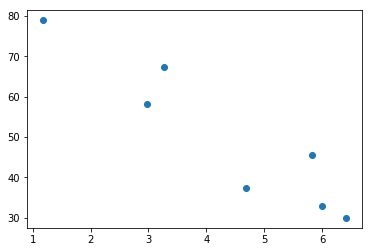

In [4]:
#Plot the data
plt.scatter(X,y)

### Initialize a Model

In [5]:
#Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Fit the Model

In [6]:
#Fit the model to the data
#Note this is the training step where you fit the line to the data

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-9.00946642]]
y-axis intercept:  [89.12387377]


In [8]:
# Note: we have to transform our min and max values so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

print(f'Min X Value: {x_min}')
print(f'Max X Value: {x_max}')

Min X Value: [[1.17]]
Max X Value: [[6.41]]


In [9]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

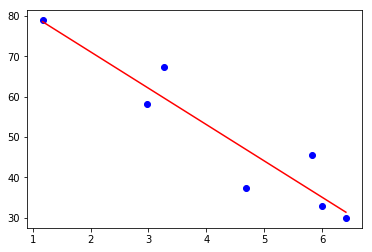

In [10]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X,y,c='blue')
plt.plot([x_min[0],x_max[0]],[y_min[0],y_max[0]], c='red')